In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("12家上市公司.xlsx",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,中国建筑,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,净资产收益率,15.97%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,营业利润率,0.059755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,盈余现金保障倍数,0.186292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,总资产报酬率,0.046413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data=data.iloc[:,[1,2]]
data.head()

,1,2
0,中国建筑,2018
1,净资产收益率,15.97%
2,营业利润率,0.059755
3,盈余现金保障倍数,0.186292
4,总资产报酬率,0.046413


In [4]:
data=data.set_index(1)
data.head()

,2
1,
中国建筑,2018
净资产收益率,15.97%
营业利润率,0.059755
盈余现金保障倍数,0.186292
总资产报酬率,0.046413


In [7]:
pd.unique(data.T.columns)

array(['中国建筑', '净资产收益率', '营业利润率', '盈余现金保障倍数', '总资产报酬率', '成本费用利润率',
       '资本收益率', '上海建工', '重庆建工', '中南建设', '龙元建设', '宁波建工', '中国海诚', '中国武夷',
       '同济科技', '空港股份', '高新发展'], dtype=object)

In [8]:
指标=['净资产收益率', '营业利润率', '盈余现金保障倍数', '总资产报酬率', '成本费用利润率',
       '资本收益率']
公司名称=['中国建筑','上海建工', '重庆建工', '中南建设', '龙元建设', '宁波建工', '中国海诚', '中国武夷',
       '同济科技', '空港股份', '高新发展']

In [9]:
data2=pd.DataFrame({"公司名称":公司名称})
for s in 指标: 
    data2[s]=list(data.T[s].stack())
data2.净资产收益率=data2.净资产收益率.str.replace("%","")

In [46]:
data2.iloc[:,1:]=data2.iloc[:,1:].astype(float)
data2.to_excel("整理后的数据.xlsx",index=False,encoding="utf-8")

In [49]:
data2.iloc[:,1:].corr().to_excel("相关系数矩阵.xlsx",encoding='utf-8')

In [17]:
LA_data_final_feat=data2.iloc[:,1:]
# 计算巴特利特P值
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(LA_data_final_feat)
print(chi_square_value, p_value )
# 计算KMO值 
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(LA_data_final_feat)
print(kmo_all,kmo_model)

57.71084117657278 6.213994666857157e-07
[0.59668645 0.44843643 0.56759178 0.51282568 0.43912212 0.51490856] 0.5018656197600082


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [18]:
# Create factor analysis object and perform factor analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(LA_data_final_feat.shape[1]+1, rotation=None)
fa.fit(LA_data_final_feat)
ev, v = fa.get_eigenvalues() # 计算特征值和特征向量
var = fa.get_factor_variance()#给出方差贡献率

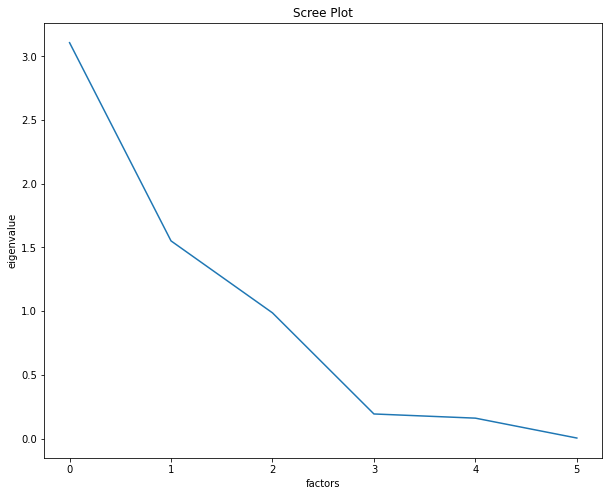

In [39]:
##绘制方差的图
plt.figure(figsize=(10,8))
plt.plot(ev)
plt.title("Scree Plot")
plt.xlabel("factors")
plt.ylabel("eigenvalue")
plt.savefig("落石图",dpi=600)

In [36]:
fa = FactorAnalyzer(3, rotation="varimax")
fa.fit(LA_data_final_feat)
# 输出载荷矩阵
df_loading = pd.DataFrame(fa.loadings_,index=LA_data_final_feat.columns.tolist())
df_loading

,0,1,2
净资产收益率,0.059646,0.517084,0.712976
营业利润率,0.977425,0.098746,0.148359
盈余现金保障倍数,0.190327,0.065252,0.901186
总资产报酬率,-0.002195,0.892603,0.087288
成本费用利润率,0.983723,0.127099,0.123396
资本收益率,0.300293,0.837578,0.258092


In [50]:
df_loading.to_excel("因子载荷矩阵.xlsx")

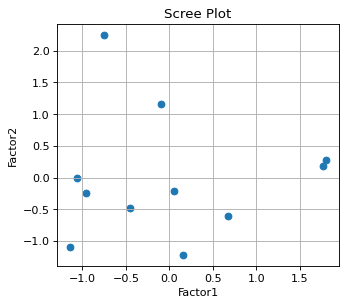

In [38]:
#计算因子得分
LA_data_trans = pd.DataFrame(fa.transform(LA_data_final_feat),index=data2['公司名称'])

#以散点图的形式呈现
plt.figure(figsize=(10,4), dpi= 80)
plt.subplot(1,2,1)
plt.scatter(LA_data_trans.loc[:,0],LA_data_trans.loc[:,1])
plt.title('Scree Plot')
plt.xlabel('Factor1')
plt.ylabel('Factor2')
plt.grid()

In [51]:
LA_data_trans.to_excel("每个因子的得分.xlsx")

In [43]:
LA_data_trans

,0,1,2
公司名称,,,
中国建筑,-0.094347,1.151735,0.241735
上海建工,-0.957400,-0.243421,0.389261
重庆建工,-1.141790,-1.088888,0.181940
中南建设,0.161708,-1.218209,1.235198
龙元建设,0.058557,-0.215635,0.118033
宁波建工,-1.066961,-0.001756,0.373467
中国海诚,-0.750870,2.243837,0.248477
中国武夷,1.765221,0.177482,-0.660515
同济科技,1.802831,0.274155,0.696059
